# [E-08] 뉴스 요약봇 만들기

* 텍스트 요약은 끊임없이 늘어나는 정보를 쉽고 빠르게 소화하기 위해 중요한 기술임. 긴 길이의 문서 원문을 핵심 주제만으로 구성된 짧은 요약 문장들로 변환하는 것을 말한다.
* 예를 들어 상대적으로 큰 텍스트인 뉴스 기사로 작은 텍스트인 뉴스 제목을 만들어내는 것이 텍스트 요약의 대표적인 예라고 할 수 있다.

* 텍스트 요약을 할 때 중요한 건, 요약 전후에 정보 손실 발생이 최소화되어야 한다는 것이다. 요약문은 문서 원문이 담고 있는 정보를 최대한 보존해야하하며, 이는 원문의 길이가 길 수록 만만치 않은 어려운 작업이 된다. 

텍스트 요약은 크게 두가지 접근으로 나눌 수 있다.
* **추출 요약**
    * 원문에서 문장을 추출해 요약하는 방식
    * 문장의 연결이 자연스럽지 않을 수 있음.
    * 딥러닝보다는 주로 전통적인 머신러닝 방식에 속하는 텍스트 랭크(Text Rank)와 같은 알고리즘을 사용한다.
    * 대표적으로 네이버 뉴스 서비스인 요약봇이 있다.
    * 원문을 대표하는 단어들로 이루어진 핵심문장을 효과적으로 찾아낸다.
    * 요약문에 사용된 문장은 원문에 그대로 있음.
* **추상 요약**
    * 원문으로부터 요약된 새로운 문장을 생성해낸다.
    * 결과로 나온 문장이 원문에 원래 없던 문장일 수도 있다.
    * 자연어 처리 분야 중 자연어 생성(Natural Language General, NLG)의 영역.

* 자연어 생성에서 가장 기본적으로 RNN이 쓰이는데, 학습 데이터의 길이가 길어질 수록 먼 과거의 정보를 잊어버리는 장기 의존성(long term dependencies) 문제가 있음. 이를 해결하기 위해 LSTM, GRU, 다음으로 Attention 메커니즘이 등장함.

* seq2seq
    * 두 개의 RNN 아키텍처를 사용해 입력 시퀀스로부터 출력 시퀀스를 생성하는 자연어 생성 모델임.
    * 주로 뉴럴 기계번역에 사용되는 모델인데, 원문을 요약문으로 번역한다고 생각하면 된다.
    * 원문을 첫 번째 RNN인 인코더로 입력하면, 인코더는 이를 하나의 고정된 벡터로 변환한다.
    * 이 벡터를 문맥 정보를 가지고 있는 벡터라고 하며 컨텍스트 벡터(context vector)라고 한다.
    * 두 번째 RNN인 디코더는 이 컨텍스트 벡터를 전달받아 한 단어씩 생성해내서 요약 문장을 완성한다.

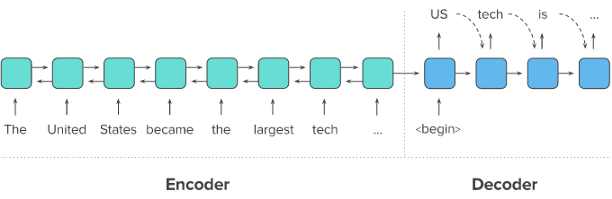

이번 노드에서는 seq2seq 인코더와 디코더로 LSTM을 사용한다. 
* LSTM
    * 다음 time step에 hidden state뿐만 아니라, cell state도 함께 전달한다.
    * 인코더가 디코더에 전달하는 컨텍스트 벡터 또한 hidden state(h) 와 cell state(c) 두 개의 값 모두가 존재해야 하는 것

seq2seq 구조에서 디코더는 시작 토큰 SOS가 입력되면 각 시점마다 단어를 생성하고 이 과정을 종료 토큰인 EOS를 예측하는 순간까지 멈추지 않는다. 즉, 훈련 데이터의 예측 대상 시퀀스의 앞, 뒤에는 시작 토큰과 종료 토큰을 넣어주는 전처리를 통해 어디서 멈춰야 하는지 알려줄 필요가 있다.

기존 seq2seq는 **인코더의 마지막 time step의 hidden state를 컨텍스트 벡터로 사용했다.** 하지만 RNN 계열의 인공신경망(바닐라 RNN, LSTM, GRU)의 한계로 인해 컨텍스트 정보에는 이미 입력 시퀀스의 많은 정보가 손실이 된 상태가 되어버린다. 그래서 이 해결책으로 **어텐션 메커니즘(Attention Mechanism)을 활용한다.**

* 어텐션 메커니즘(Attention Mechanism)

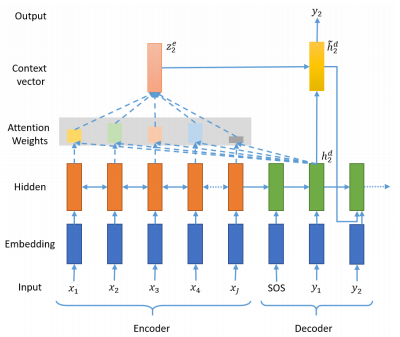

어텐션 메커니즘은 기존의 컨텍스트 벡터보다 인코더의 정보를 적극적으로 활용해 성능을 끌어올린다.
* 인코더의 모든 step의 hidden state의 정보가 컨텍스트 전부 반영되도록 한다.
* 단, 디코더의 현재 time step의 예측에 인코더의 각 step이 얼마나 영향을 미치는지에 따른 가중합으로 계산되는 방식으로, 인코더의 모든 hidden state가 동일한 비중으로 반영되지는 않는다.
* 즉, hidden state의 가중치 값은 **디코더의 현재 스텝이 어디냐에 따라 계속 달라진다.**
* 디코더의 현재 문장 생성 부위가 주어부인지, 술어부인지, 목적어인지 등에 따라 인코더가 입력 데이터를 해석한 컨텍스트 벡터가 다른 값이 된다는 것임.(기본 seq2seq 모델에서 컨텍스트 벡터는 디코더의 현재 스텝 위치에 무관하게 한번 계산되면 고정값을 가진다.)

<hr>

## 순서
### 1. 프로젝트 전 실습
### 2. 프로젝트: 뉴스 기사 요약해보기

***

## 프로젝트 전 실습

### 데이터 준비하기

* 이번 노드에서는 영어기호, 통계, 자연어 처리를 위한 라이브러리인 NLTK(Natural Language Toolkit)의 불용어(stopwords)를 사용한다. 이 라이브러리에는 문장에는 자주 등장하지만 의미를 분석하고 요약하는 데는 거의 의미가 없는 100여개의 불용어가 미리 정리되어 있으므로 이를 이용해 불용어를 제거하는 작업을 진행한다.

In [2]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# 10만개의 샘플만 사용해본다.
data = pd.read_csv(os.getenv('HOME') + '/aiffel/news_summarization/data/Reviews.csv', nrows=100000)
print('전체 샘플수 : ', (len(data)))

전체 샘플수 :  100000


In [4]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
# 전체 데이터 중 Summary열과 Text열만 훈련에 사용하니까 이 두 열만 별도로 저장
data = data[['Text', 'Summary']]
data.head()

# 랜덤한 15개 샘플
data.sample(15)

,Text,Summary
2132,My two boys love the Happy Munchies Cheddar Ch...,Yummy!
69765,Some Kinda Good !!! plain and simple food is s...,Some Kinda Good !!!
60915,"These are great, our dog has never had to have...",Costco has stopped carrying Checkups
10323,my husband loves these! right now we are curre...,great choice for husbands!
86748,We chose a Thing 1/Thing 2 theme for our twins...,Perfect for our cupcakes!
53256,A delectable treat from the manufacturer of Be...,best milk chocolate ever
97819,"you know how much calories you are taking in, ...",good price good taste
25682,"I've eaten a few of these, and while they tast...",Awful Taste
73794,I bought these for my mom and she loved them s...,sounds good
70530,WARNING WARNING WARNING! I searched for gluten...,WARNING: NOT Gluten Free


### 데이터 전처리(1) 데이터 정리하기

In [6]:
# 중복 샘플 유무 확인
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 88426
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 72348


이 데이터의 summary는 'Smelly'나 'Good Product'와 같이 간단한 요약들도 많아서 Text가 달라도 Summary는 동일할 수 있다. 하지만 Text 자체가 중복이 된 경우는 중복 샘플이니까 제거해야함.

In [7]:
# 중복 샘플 제거
data.drop_duplicates(subset = ['Text'], inplace=True)
print('전체 샘플수 : ', len(data))

전체 샘플수 :  88426


* 알게된 것
    * drop_duplicates: 중복 샘플 제거 메서드

In [8]:
# null값이 있는지 확인
print(data.isnull().sum())

Text       0
Summary    1
dtype: int64


In [9]:
# summary에 있는 null 제거
data.dropna(axis=0, inplace=True)
print('전체 샘플수 : ', (len(data)))

전체 샘플수 :  88425


위 88,425개의 샘플 중 같은 의미인데도 다른 표현으로 쓰여 마치 다른 단어들처럼 간주되는 경우가 있다. 예를 들어, it'll은 it will과 같고 mustn't과 must not은 사실 같은 표현이다. 이런 표현을 학습 전에 미리 같은 표현으로 통일 시켜주는 것이 연산량을 줄일 수 있는 방법이다. 이를 **텍스트 정규화(text normalization)라고 한다.** 

In [10]:
# 텍스트 정규화
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [12]:
# NLTK에서 미리 정의하여 제공하고 있는 불용어 
print('불용어 개수 : ', len(stopwords.words('english')))
print(stopwords.words('english'))

불용어 개수 :  179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', '

In [14]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

단, Abstractive한 문장 요약 결과문이 자연스러운 문장이 되려면 불용어들이 summary에는 남아 있는게 좋다. 그래서 함수의 인자로 remove_stopwords를 추가하고 if문을 추가함

In [15]:
# 전처리 전, 후의 결과를 확인하기 위해 임의의 text와 summary를 만들어 함수를 호출한다.
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


In [16]:
clean_text = []
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
for s in data['Text']:
    clean_text.append(preprocess_sentence(s))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  ['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better', 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo', 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch', 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal', 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']


In [17]:
# summary에 대해서 전처리 함수를 호출할 땐 불용어 제거를 수행하지 않는다는 의미에서 두 번째 인자로 false를 넣어준다

clean_summary = []
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
for s in data['Summary']:
    clean_summary.append(preprocess_sentence(s, False))

print("Summary 전처리 후 결과: ", clean_summary[:5])

Summary 전처리 후 결과:  ['good quality dog food', 'not as advertised', 'delight says it all', 'cough medicine', 'great taffy']


텍스트 정제 과정을 거친 후에는 다시 한번 빈 샘플이 생겼는지 확인해야 한다. 왜냐면 정제 전에는 데이터가 존재했지만, 정제 과정에서 문장의 모든 단어가 사라지는 경우가 있을 수 있기 때문이다. 빈(empty) 값을 가진 샘플들이 있다면, **모두 null 값을 가진 샘플로 대체한다.**

In [18]:
data['Text'] = clean_text
data['Summary'] = clean_summary

# 빈 값을 null로 변환
data.replace('', np.nan, inplace=True)

In [19]:
data.isnull().sum()

Text        0
Summary    70
dtype: int64

In [20]:
# 정제 과정에서 생긴 Summary 열의 빈 샘플을 제거해준다

data.dropna(axis=0, inplace=True)
print('전체 샘플 수 : ', (len(data)))

전체 샘플 수 :  88355


### 데이터 전처리 (2) 훈련데이터와 테스트 데이터 나누기

학습을 진행하기 위해서는 학습에 사용할 데이터의 크기를 결정하고, 문장의 시작과 끝을 표시해 줘야 한다.

텍스트의 최소 길이 : 2
텍스트의 최대 길이 : 1235
텍스트의 평균 길이 : 38.792428272310566
요약의 최소 길이 : 1
요약의 최대 길이 : 28
요약의 평균 길이 : 4.010729443721352


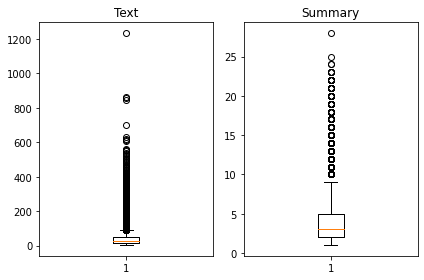

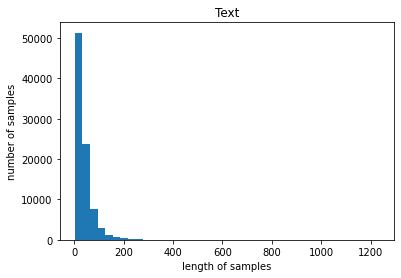

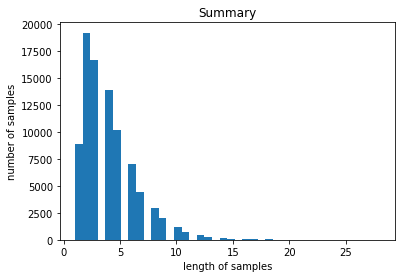

In [21]:
# 샘플의 최대 길이 정하기
# Text와 Summary의 최소, 최대, 평균 길이를 구하고, 또한 길이 분포를 시각화한다.
# 길이 분포 출력

import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [22]:
# 적절한 최대 길이를 임의로 정한다.
text_max_len = 50
summary_max_len = 8

In [23]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [24]:
below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len,  data['Summary'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.7745119121724859
전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9424593967517402


In [26]:
# 정해진 길이에 맞춰 자르는게 아니라, 정해진 길이보다 길면 제외하는 방법으로 데이터를 정제한다.

data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 65818


In [27]:
# 시작 토큰과 종료 토큰을 추가한다.
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')
data.head()

,Text,Summary,decoder_input,decoder_target
0,bought several vitality canned dog food produc...,good quality dog food,sostoken good quality dog food,good quality dog food eostoken
1,product arrived labeled jumbo salted peanuts p...,not as advertised,sostoken not as advertised,not as advertised eostoken
2,confection around centuries light pillowy citr...,delight says it all,sostoken delight says it all,delight says it all eostoken
3,looking secret ingredient robitussin believe f...,cough medicine,sostoken cough medicine,cough medicine eostoken
4,great taffy great price wide assortment yummy ...,great taffy,sostoken great taffy,great taffy eostoken


In [28]:
# 인코더의 입력, 디코더의 입력과 레이블을 각각 다시 numpy 타입으로 저장한다.
encoder_input = np.array(data['Text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

In [29]:
# 훈련데이터와 테스트 데이터를 분리
# encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스를 만들어준다.
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[23517 50115 44777 ... 11844 30428 33126]


In [30]:
# 위에서 만든 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의해 주면 잘 섞인 샘플이 된다
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [31]:
# 전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의해 준다.
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 13163


In [32]:
# 정의한 테스트 데이터의 개수를 이용해 전체 데이터를 양분한다.
# ':'표시의 위치에 주의할 것
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 52655
훈련 레이블의 개수 : 52655
테스트 데이터의 개수 : 13163
테스트 레이블의 개수 : 13163


### 데이터 전처리 (3) 정수 인코딩

기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터의 단어들을 모두 정수로 바꿔야한다. 이를 위해 각 단어에 고유한 정수를 맵핑하는 작업이 필요한데, 이 과정을 **단어집합(vocabulary)을 만든다고 한다.**

In [33]:
# 우선 원문에 해당되는 encoder_input_train에 대해 단어 집합을 만든다.
# keras의 토크나이저를 사용하면 입력된 데이터 훈련 데이터로부터 단어 집합을 만들 수 있다.

src_tokenizer = Tokenizer() # tokenizer 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [34]:
# 생성된 단어 집합은 src_tokenizer.word_index에 저장되어 있음
# 모두 사용하는 것이 아닌 빈도수가 낮은 단어들은 훈련 데이터에서 제외하고 진행한다.
# 등장 빈도수가 7회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인한다.
# src_tokenizer.word_counts.items() 에는 단어와 각 단어의 등장 빈도수가 저장돼 있다.
# 이를 통해 통계적인 정보를 얻을 수 있음.

threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 31921
등장 빈도가 6번 이하인 희귀 단어의 수: 23671
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 8250
단어 집합에서 희귀 단어의 비율: 74.1549450205194
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.372270011768499


In [35]:
# 빈도수 6회 이하인 단어들을 뺀 단어 집합의 크기인 8000으로 크기를 제한한다.
src_vocab = 8000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

In [36]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[6, 462, 8, 14, 5887, 400, 375, 2735, 8, 5887, 400, 165, 1210, 52, 121, 821, 462, 1007, 1007, 1588, 444, 90, 609, 565, 6, 1171, 1869, 4262, 121, 1026, 682, 330, 8, 1210, 52, 121], [192, 1975, 76, 3101, 2491, 7, 2231, 136, 152, 7, 423, 96, 274, 3101, 3233, 4, 5, 1191, 1775, 171, 1504, 98, 81, 64, 4, 2973, 3101, 1877, 2417, 230, 1168, 208, 507, 152, 1751, 7, 2, 5, 161, 1135], [3, 172, 5637, 146, 29, 1665, 58, 4263, 222, 172, 251, 108, 138, 25, 87]]


In [38]:
# Summary 데이터에 대해서도 동일한 작업을 수행한다.
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [39]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10502
등장 빈도가 5번 이하인 희귀 단어의 수: 8141
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2361
단어 집합에서 희귀 단어의 비율: 77.51856789183013
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.950238904911541


In [40]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 105, 1372, 394], [1, 198, 31, 12], [1, 3, 97], [1, 533, 109, 117, 6, 1685, 83], [1, 3, 75]]
target
decoder  [[105, 1372, 394, 2], [198, 31, 12, 2], [3, 97, 2], [533, 109, 117, 6, 1685, 83, 2], [3, 75, 2]]


다음 작업인 패딩으로 넘어가기 전에, 전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것은 빈도수가 낮은 단어만으로 구성되었던 샘플들은 이제 빈(empty) 샘플이 되었을 가능성이 있다. 이 현상은 길이가 상대적으로 길었던 원문의 경우에는 문제가 없겠지만, 평균 길이가 4 밖에 되지 않았던 요약문(Summary)의 경우에는 이 현상이 굉장히 두드러졌을 가능성이 높다.

훈련 데이터와 테스트 데이터에 대해서 요약문의 길이가 1인 경우의 인덱스를 각각 drop_train, drop_test에 저장한다.(이 샘플들은 모두 삭제함)
* 단, 요약문인 decoder_input에는 sostoken 또는 decoder_target에는 eostoken이 추가된 상태이다.
* 이 두 토큰은 모든 샘플에서 등장하므로 빈도수가 샘플 수와 동일하게 매우 높으므로 단어 집합 제한에도 삭제되지 않는다.
* 그래서 길이가 0이 된 요약문도 실제 길이는 1이 나올 것임. 길이 0이 된 decoder_input에는 sostoken, decoder_target에는 eostoken만 남아있기 때문이다.

In [41]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 1277
삭제할 테스트 데이터의 개수 : 314
훈련 데이터의 개수 : 51378
훈련 레이블의 개수 : 51378
테스트 데이터의 개수 : 12849
테스트 레이블의 개수 : 12849


훈련 데이터와 테스트 데이터 모두 일정량의 샘플들이 제거된 것을 확인할 수 있다.

* 패딩
    * 텍스트 시퀀스를 정수 시퀀스로 변환했다면, 이제 서로 다른 길이의 샘플들을 병렬 처리하기 위해 같은 길이로 맞춰주는 패딩 작업을 해야한다.
    * 최대 길이보다 짧은 데이터들은 뒤의 공간에 숫자 0을 넣어 최대 길이로 맞춰준다.

In [43]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')

### 모델 설계하기

In [44]:
# 먼저 함수형 API를 이용해 인코더를 설계한다.

from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

* 설명
    * 임베딩 벡터의 차원은 128, hidden state의 크기는 256
    * hidden state는 LSTM에서 얼만큼의 수용력(capacity)를 가질지 정하는 파라미터이다.
    * 이 파라미터는 LSTM의 용량의 크기나 LSTM에서의 뉴런의 개수라고 이해하면 됨**(무조건 용량을 많이 준다고 해서 성능이 반드시 올라가는 것은 아니다)**
    * LSTM은 총 3개의 층으로 구성해 모델의 복잡도를 높였다.(hidden state의 크기를 늘리는 것이 LSTM층 1개의 용량을 늘린다면, 3개의 층을 사용하는 것은 모델의 용량을 늘린다고 볼 수 있다). 3개의 층을 지나서 인코더로부터 나온 출력 벡터는 디코더로 보내줌.

* dropout, recurrent dropout
    * 일반적인 dropout은 레이어의 weight를 랜덤으로 생략하여 모델의 과적합을 해결해주는 방법이다.
    * 반면 recurrent dropout은 dropout을 레이어가 아닌 time step마다 해주는 방식임.
    * 즉, time step의 입력을 랜덤으로 생략해주는 것이다. 일반적인 dropout와 같이 regularization을 해주는 효과가 있고, 과적합을 방지할 수 있다.

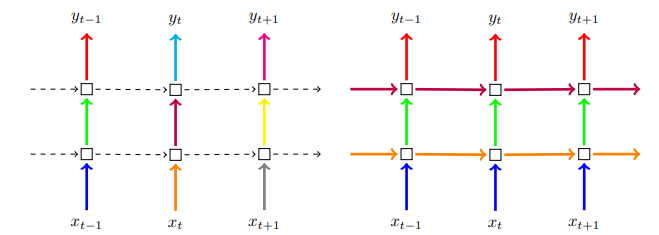

왼쪽은 dropout, 오른쪽은 dropout+recurrent dropout이다.

In [45]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [46]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

지금까지 설계한 것은 인코더의 hidden state와 cell state를 디코더의 초기 state로 사용하는 가장 기본적인 seq2seq이다. 이제 디코더의 출력층 설계를 살짝 바꿔 성능을 높일 수 있는 방법인 어텐션 메커니즘을 활용해보자.

In [47]:
# 단, 이번 노드에서는 tensorflow에 이미 구현된 어텐션 함수를 가져와 활용한다.

from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

### 모델 훈련하기

In [48]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
201/201 [==============================] - 150s 667ms/step - loss: 2.7065 - val_loss: 2.4200
Epoch 2/50
201/201 [==============================] - 131s 654ms/step - loss: 2.3835 - val_loss: 2.2668
Epoch 3/50
201/201 [==============================] - 131s 654ms/step - loss: 2.2260 - val_loss: 2.1369
Epoch 4/50
201/201 [==============================] - 131s 651ms/step - loss: 2.1083 - val_loss: 2.0501
Epoch 5/50
201/201 [==============================] - 130s 649ms/step - loss: 2.0205 - val_loss: 1.9938
Epoch 6/50
201/201 [==============================] - 130s 647ms/step - loss: 1.9575 - val_loss: 1.9545
Epoch 7/50
201/201 [==============================] - 130s 649ms/step - loss: 1.9085 - val_loss: 1.9327
Epoch 8/50
201/201 [==============================] - 130s 647ms/step - loss: 1.8651 - val_loss: 1.9098
Epoch 9/50
201/201 [==============================] - 130s 649ms/step - loss: 1.8258 - val_loss: 1.8933
Epoch 10/50
201/201 [==============================] - 132s 657m

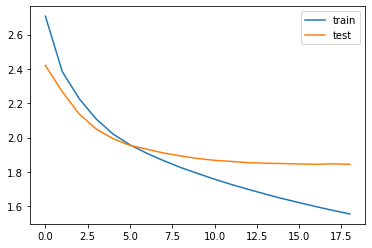

In [49]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### 인퍼런스 모델 구현하기

In [50]:
# 정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원해야힌다.
# 필요한 3개의 사전을 미리 준비

src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

seq2seq는 훈련할 때와 실제 동작할 때(인퍼런스 단계)의 방식이 다르다. 따라서 그에 맞게 모델 설계를 별개로 진행해야 함.
정답 문장이 없는 인퍼런스 단계에서는 만들어야 할 문장의 길이만큼 디코더가 반복 구조로 동작해야하니까 인퍼런스를 위한 모델 설계를 별도로 해야한다.

In [58]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [59]:
# 어텐션 메커니즘을 사용하는 출력층 설계
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [61]:
# 단어 시퀀스를 완성하는 함수

def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

### 모델 테스트하기

In [63]:
# 주어진 정수 시퀀스를 텍스트 시퀀스로 변환하는 함수
# Text의 정수 시퀀스에서는 패딩을 위해 사용되는 숫자 0을 제외하고
# Summary의 정수 시퀀스에서는 숫자 0, 시작 토큰의 인덱스, 종료 토큰의 인덱스를 출력에서 제외
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [64]:
# 테스트 데이터의 약 50개의 샘플에 대해서 실제 요약과 예측된 요약 비교
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : tried another popular brand wabash ok one rocks thought use combination butter salt never need look another butter topping golden delight heavenly 
실제 요약 : the best 
예측 요약 :  best thing ever


원문 : feels good use broth laden chemicals tastes great complaints rave reviews 
실제 요약 : really good 
예측 요약 :  great product


원문 : got local publix best tasting almonds bunch butter toffee tastes natural almonds good quality also make dark chocolate covered almonds taste like cocoa puffs still pretty good looking cocoa kick instead 
실제 요약 : best snack ever 
예측 요약 :  delicious


원문 : greek yogurt acquired tasted thick tart tasting tastes good toppings like strawberry honey taste something would choose without additional flavor 
실제 요약 : acquired taste 
예측 요약 :  great sugar free sugar free sugar free


원문 : wow great concept products see taking products run great way make sure stay healthy like pkg size easy take going review products loves concept 
실제 요약 : healthy 
예측 요약 :  good but not great


### 추출적 요약 해보기

In [65]:
# 데이터 다운로드
import requests
from summa.summarizer import summarize

In [67]:
# 매트릭스 시놉시스 다운로드
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text

In [68]:
print(text[:1500])

The screen is filled with green, cascading code which gives way to the title, The Matrix.

A phone rings and text appears on the screen: "Call trans opt: received. 2-19-98 13:24:18 REC: Log>" As a conversation takes place between Trinity (Carrie-Anne Moss) and Cypher (Joe Pantoliano), two free humans, a table of random green numbers are being scanned and individual numbers selected, creating a series of digits not unlike an ordinary phone number, as if a code is being deciphered or a call is being traced.

Trinity discusses some unknown person. Cypher taunts Trinity, suggesting she enjoys watching him. Trinity counters that "Morpheus (Laurence Fishburne) says he may be 'the One'," just as the sound of a number being selected alerts Trinity that someone may be tracing their call. She ends the call.

Armed policemen move down a darkened, decrepit hallway in the Heart O' the City Hotel, their flashlight beam bouncing just ahead of them. They come to room 303, kick down the door and find a

* summarize 사용하기
    * summa의 summarize()의 인자로 사용되는 값들
        * text(str): 요약할 텍스트
        * ratio(float, optional): 요약문에서 원본에서 선택되는 문장 비율, 0~1 사이값
        * words(int or None, optional): 출력에 포함할 단어 수, 만약 ratio와 함께 두 파라미터가 모두 제공되는 경우 ratio는 무시한다.
        * split(bool, optional): True면 문장 list, False는 조인(join)된 문자열을 반환

In [69]:
# Summa의 summarize는 문장 토큰화를 별도로 하지않아도 내부적으로 토큰화를 수행한다.
# 그래서 문장 구분이 되어있지 않은 원문을 바로 입력으로 넣을 수 있다.
# 비율을 적게 주어서 요약문으로 선택되는 문장의 개수를 줄임.(원문의 0.005%)

print('Summary:')
print(summarize(text, ratio=0.005))

Summary:
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [70]:
# 리스트로 출력 결과를 받고 싶으면 split 인자의 값을 True로 한다.

print('Summary:')
print(summarize(text, ratio=0.005, split=True))

Summary:
['Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.', 'Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.']


In [71]:
# 단어의 수로 요약문의 크기를 조절할 수도 있다.
# 여기선 단어를 50개만 선택

print('Summary:')
print(summarize(text, words=50))

Summary:
Trinity takes Neo to Morpheus.
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


## 프로젝트: 뉴스 기사 요약해보기

* 루브릭 평가 기준
    * 분석, 정제, 졍규화와 불용어 제거, 데이터셋 분리, 인코딩 과정 단계가 빠짐없이 체계적으로 진행되었다.
    * 모델학습이 안정적으로 수렴되었음을 그래프를 통해 확인하였으며, 실제 요약문과 유사한 요약문장을 얻을 수 있었다.
    * 두 요약 결과를 문법 완성도 측면과 핵심 단어 포함 측면으로 나누어 비교 분석 결과를 제시하였다.

In [3]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### step1. 데이터 수집하기

In [4]:
# 데이터 다운로드
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [5]:
data.sample(10)

,headlines,text
48302,Mutual funds are no substitute for bank return...,Markets regulator SEBI's Chairman Ajay Tyagi h...
32429,'Aliens' will conduct elections in Pakistan: P...,Pakistan PM Shahid Khaqan Abbasi has said that...
22824,Indian carriers need $50bn to buy planes over ...,Indian carriers will require $50 billion of fi...
5596,"Mera Bharat mahaan, meri madam mahaan: Ansari'...",Indian engineer Hamid Ansari and his mother Fa...
78384,Maharashtra govt plans helipad audit post CM's...,Maharashtra government has announced plans to ...
46556,"Bihar district constructs record 11,000+ toile...",Gopalganj district in Bihar has set a record b...
92742,Proud to have been born in India: Canada's Def...,Rejecting allegations that he supported Khalis...
20347,Myanmar leader stripped of 7th honour over Roh...,Myanmar leader Aung San Suu Kyi has been strip...
86288,Video banned by Russian court uploaded on Pornhub,After a Russian court ordered opposition activ...
2720,B'desh man jailed over photoshopped pics of Ma...,A man who photoshopped and shared images of fo...


text열을 본문, headlines를 요약된 데이터로 보고 진행한다.

### step2. 데이터 전처리하기(추상적 요약)

In [6]:
# 중복 샘플 유무 확인
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())

text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [7]:
# 중복 샘플을 제거한다.
data.drop_duplicates(subset = ['text'], inplace=True)
print('text열 전체 샘플수 : ', len(data))

data.drop_duplicates(subset = ['headlines'], inplace=True)
print('headlines열 전체 샘플수 : ', len(data))

text열 전체 샘플수 :  98360
headlines열 전체 샘플수 :  98262


중복 샘플 제거 결과가 이전과 같은 걸로 봐서 text 열에 중복된 샘플은 없는 것 같고, headlines열에는 약 18개의 샘플이 제거되었다. 뉴스 헤드라인의 경우 실습에 있었던 것과 달리 간단한 요약은 없을 것으로 판단해 제거했다.

In [8]:
# null값이 있는지 확인
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


null값이 없으므로 결측치 제거는 수행하지 않아도 될 것 같다.

In [9]:
# 텍스트 정규화
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [10]:
# NLTK에서 미리 정의하여 제공하고 있는 불용어 
print('불용어 개수 : ', len(stopwords.words('english')))
print(stopwords.words('english'))

불용어 개수 :  179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', '

In [11]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [12]:
# 전처리 전, 후의 결과를 확인하기 위해 임의의 text와 summary를 만들어 함수를 호출한다.
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


In [13]:
clean_text = []
# 전체 Text 데이터에 대한 전처리
for s in data['text']:
    clean_text.append(preprocess_sentence(s))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

이전 아마존 리뷰로 실습할 때와 같이 요약 결과가 자연스럽게 출력되려면 불용어가 남아있는게 좋으므로 headlines 열에 있는 불용어는 남겨둔다.

In [14]:
# headlines에 대해서 전처리 함수를 호출할 땐 불용어 제거를 수행하지 않는다는 의미에서 두 번째 인자로 false를 넣어준다

clean_summary = []
# 전체 Summary 데이터에 대한 전처리 
for s in data['headlines']:
    clean_summary.append(preprocess_sentence(s, False))

print("headlines 전처리 후 결과: ", clean_summary[:5])

headlines 전처리 후 결과:  ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


텍스트 정제 과정에서 생겼을 수 있는 빈 샘플을 확인하고 제거한다.

In [15]:
data['text'] = clean_text
data['headlines'] = clean_summary

# 빈 값을 null로 변환
data.replace('', np.nan, inplace=True)

In [16]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [17]:
# 정제 과정에서 생긴 Summary 열의 빈 샘플을 제거해준다

data.dropna(axis=0, inplace=True)
print('전체 샘플 수 : ', (len(data)))

전체 샘플 수 :  98262


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.10029309397326
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299444342675704


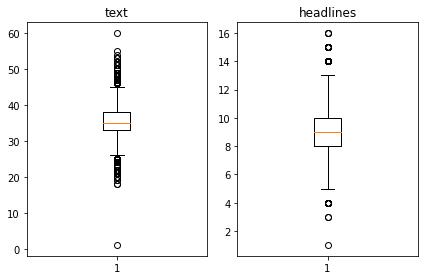

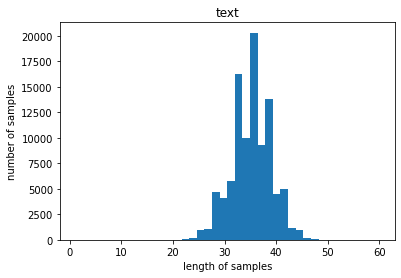

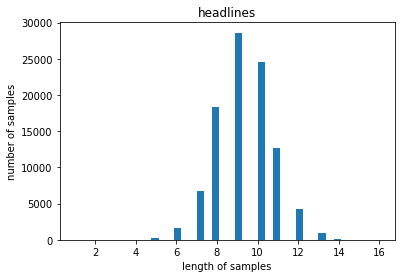

In [18]:
# 샘플의 최대 길이 정하기
# Text와 Summary의 최소, 최대, 평균 길이를 구하고, 또한 길이 분포를 시각화한다.
# 길이 분포 출력

import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
summary_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [19]:
# 적절한 최대 길이를 임의로 정한다.
text_max_len = 38
summary_max_len = 11

In [20]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [21]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(summary_max_len,  data['headlines'])

전체 샘플 중 길이가 38 이하인 샘플의 비율: 0.816317599886019
전체 샘플 중 길이가 11 이하인 샘플의 비율: 0.9450041725183692


In [22]:
# 정해진 길이에 맞춰 자르는게 아니라, 정해진 길이보다 길면 제외하는 방법으로 데이터를 정제한다.

data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 75679


In [23]:
# 시작 토큰과 종료 토큰을 추가한다.
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...
7,govt directs alok verma to join work day befor...,weeks ex cbi director alok verma told departme...,sostoken govt directs alok verma to join work ...,govt directs alok verma to join work day befor...
8,called pm modi sir times to satisfy his ego an...,andhra pradesh cm chandrababu naidu said met u...,sostoken called pm modi sir times to satisfy h...,called pm modi sir times to satisfy his ego an...


In [24]:
# 인코더의 입력, 디코더의 입력과 레이블을 각각 다시 numpy 타입으로 저장한다.
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

In [25]:
# 훈련데이터와 테스트 데이터를 분리
# encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스를 만들어준다.
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[51965 39686 11375 ... 19020 48025  5430]


In [26]:
# 위에서 만든 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의해 주면 잘 섞인 샘플이 된다
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [27]:
# 전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의해 준다.
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 15135


In [28]:
# 정의한 테스트 데이터의 개수를 이용해 전체 데이터를 양분한다.
# ':'표시의 위치에 주의할 것
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 60544
훈련 레이블의 개수 : 60544
테스트 데이터의 개수 : 15135
테스트 레이블의 개수 : 15135


In [29]:
# 우선 원문에 해당되는 encoder_input_train에 대해 단어 집합을 만든다.
# keras의 토크나이저를 사용하면 입력된 데이터 훈련 데이터로부터 단어 집합을 만들 수 있다.

src_tokenizer = Tokenizer() # tokenizer 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [30]:
# 생성된 단어 집합은 src_tokenizer.word_index에 저장되어 있음
# 모두 사용하는 것이 아닌 빈도수가 낮은 단어들은 훈련 데이터에서 제외하고 진행한다.
# 등장 빈도수가 7회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인한다.
# src_tokenizer.word_counts.items() 에는 단어와 각 단어의 등장 빈도수가 저장돼 있다.
# 이를 통해 통계적인 정보를 얻을 수 있음.

threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 60320
등장 빈도가 6번 이하인 희귀 단어의 수: 41284
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 19036
단어 집합에서 희귀 단어의 비율: 68.44164456233422
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.097332540664867


In [31]:
# 빈도수 6회 이하인 단어들을 뺀 단어 집합의 크기인 8000으로 크기를 제한한다.
src_vocab = 19000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

In [32]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[227, 501, 273, 221, 3477, 1040, 1302, 1553, 3, 299, 482, 4096, 127, 127, 1156, 273, 1040, 807, 74, 881, 220, 74, 124, 54, 317, 4096, 10, 28, 1729, 1559, 640, 1040, 807], [5, 60, 1284, 1712, 306, 17752, 2035, 2046, 663, 347, 96, 132, 5337, 107, 347, 726, 334, 17752, 816, 25, 1388, 1499, 6726, 45, 27, 9414, 2498, 17752, 1, 931, 2127, 4920, 1228, 2, 347, 5791], [439, 15, 1091, 860, 81, 363, 42, 52, 240, 156, 541, 75, 146, 73, 5553, 2814, 247, 141, 181, 14208, 8943, 1288, 2128, 308, 6624, 2139, 1671, 424, 733, 2]]


In [33]:
# headlines 데이터에 대해서도 동일한 작업을 수행한다.
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [34]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 27051
등장 빈도가 5번 이하인 희귀 단어의 수: 18040
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9011
단어 집합에서 희귀 단어의 비율: 66.68884699271746
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.6495037069056915


In [35]:
tar_vocab = 9000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 129, 307, 106, 2779, 1257, 146, 102, 4, 285], [1, 606, 3748, 301, 1424, 3749, 136, 167, 6536], [1, 419, 11, 835, 468, 3, 90], [1, 6537, 4536, 757, 58, 3, 769, 76, 3750], [1, 5176, 943, 85, 2018, 3, 7569, 706, 7021]]
target
decoder  [[129, 307, 106, 2779, 1257, 146, 102, 4, 285, 2], [606, 3748, 301, 1424, 3749, 136, 167, 6536, 2], [419, 11, 835, 468, 3, 90, 2], [6537, 4536, 757, 58, 3, 769, 76, 3750, 2], [5176, 943, 85, 2018, 3, 7569, 706, 7021, 2]]


In [36]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 60544
훈련 레이블의 개수 : 60544
테스트 데이터의 개수 : 15135
테스트 레이블의 개수 : 15135


In [37]:
# 패딩
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')

### step3. 어텐션 메커니즘 사용하기(추상적 요약)

In [38]:
# 먼저 함수형 API를 이용해 인코더를 설계한다.

from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [39]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [40]:
# 어텐션 메커니즘

from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 38)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 38, 128)      2432000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 38, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [41]:
# 모델 훈련
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
237/237 [==============================] - 134s 526ms/step - loss: 6.0022 - val_loss: 5.5890
Epoch 2/50
237/237 [==============================] - 123s 520ms/step - loss: 5.4681 - val_loss: 5.2449
Epoch 3/50
237/237 [==============================] - 123s 521ms/step - loss: 5.1256 - val_loss: 4.9654
Epoch 4/50
237/237 [==============================] - 124s 522ms/step - loss: 4.8538 - val_loss: 4.7645
Epoch 5/50
237/237 [==============================] - 123s 520ms/step - loss: 4.6346 - val_loss: 4.6212
Epoch 6/50
237/237 [==============================] - 124s 522ms/step - loss: 4.4562 - val_loss: 4.5101
Epoch 7/50
237/237 [==============================] - 123s 521ms/step - loss: 4.3041 - val_loss: 4.4163
Epoch 8/50
237/237 [==============================] - 124s 524ms/step - loss: 4.1696 - val_loss: 4.3494
Epoch 9/50
237/237 [==============================] - 123s 521ms/step - loss: 4.0470 - val_loss: 4.2797
Epoch 10/50
237/237 [==============================] - 123s 518m

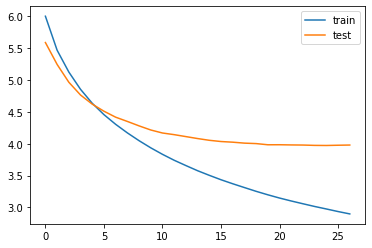

In [42]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [43]:
# 인퍼런스 모델 구현하기
# 정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원해야힌다.
# 필요한 3개의 사전을 미리 준비

src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [44]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [45]:
# 어텐션 메커니즘을 사용하는 출력층 설계
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [46]:
# 단어 시퀀스를 완성하는 함수

def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [47]:
# 모델 테스트하기
# 주어진 정수 시퀀스를 텍스트 시퀀스로 변환하는 함수
# Text의 정수 시퀀스에서는 패딩을 위해 사용되는 숫자 0을 제외하고
# Summary의 정수 시퀀스에서는 숫자 0, 시작 토큰의 인덱스, 종료 토큰의 인덱스를 출력에서 제외
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [48]:
# 테스트 데이터의 약 50개의 샘플에 대해서 실제 요약과 예측된 요약 비교
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : lionel messi brother facing eight year jail sentence charges illegal possession firearms proved gun found inside blood stained boat crashed river currently year old recovering fractured jaw injuries hospital argentina santa province 
실제 요약 : messi brother faces year jail for carrying 
예측 요약 :  messi brother jailed for marrying yr old girl in brazil


원문 : nine day event curb pollution burning kg mango wood concluded monday estimated kg carbon dioxide kg carbon kg particulate matter released air event wherein around brahmins participated organised shri samiti uttar pradesh meerut 
실제 요약 : how much pollution did the ritual to curb pollution create 
예측 요약 :  mumbai bridge collapse at record high of


원문 : man allegedly shot dead four persons apparent case road rage gurugram road police said victim shot licensed pistol altercation accused declared dead brought hospital police procured cctv footage area probe incident 
실제 요약 : man shot dead in gurugram road rage incident 
예측 요약 :  man 

### step5. summa를 이용하여 추출적 요약해보기

In [49]:
# 필요한 라이브러리 준비
import requests
from summa.summarizer import summarize

In [50]:
# 데이터 받아오기
# 이전에 받아와서 그냥 될 줄 알았는데 오류 발생
# 이유는 아직 모르겠음
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data1 = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [51]:
text = data1['text']
text[0]

"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers."

In [52]:
print(text[:1500])

0       Saurav Kant, an alumnus of upGrad and IIIT-B's...
1       Kunal Shah's credit card bill payment platform...
2       New Zealand defeated India by 8 wickets in the...
3       With Aegon Life iTerm Insurance plan, customer...
4       Speaking about the sexual harassment allegatio...
                              ...                        
1495    India head coach Ravi Shastri has said that he...
1496    Italian tennis player Andreas Seppi ensured hi...
1497    World number three Roger Federer was stopped b...
1498    A cutout of TMC chief and West Bengal CM Mamat...
1499    A Delhi court on Saturday pulled up Delhi Poli...
Name: text, Length: 1500, dtype: object


In [53]:
print('Summary:')
print(summarize(text[0], ratio=0.5))

Summary:
upGrad's Online Power Learning has powered 3 lakh+ careers.


In [54]:
# 리스트로 출력 결과 받기
print('Summary:')
print(summarize(text[0], ratio=0.5, split=True))

Summary:
["upGrad's Online Power Learning has powered 3 lakh+ careers."]


In [55]:
# 단어의 수로 요약문의 크기를 조절
print('Summary:')
print(summarize(text[0], words=50))

Summary:
Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience.
The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike.
upGrad's Online Power Learning has powered 3 lakh+ careers.


In [56]:
headlines = []
for i in range(len(text)):
    headline = summarize(text[i], ratio=0.4)
    headlines.append(headline)

In [57]:
for i in range(10):
    print("원문 :", data1['text'][i])
    print("실제 헤드라인 :", data1['headlines'][i])
    print("예측 헤드라인 :", headlines[i])
    print("\n")

원문 : Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.
실제 헤드라인 : upGrad learner switches to career in ML & Al with 90% salary hike
예측 헤드라인 : upGrad's Online Power Learning has powered 3 lakh+ careers.


원문 : Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.
실제 헤드라인 : Delhi techie wins free food from Swiggy for one year on CRED
예측 헤드라인 : Users get one CRED coin per rupee of 

### 회고

자연어 처리 중 요약은 크게 두가지로 나뉜다. 추상적 요약과 추출적 요약으로 나누어지는데, 구축 자체는 추출적 요약이 조금 더 간단한 것 같다. summa 라이브러리를 활용해 간단하다고 느꼈을 수도 있지만 핵심 문장이 이미 원문에 있는 문장에 있을 확률이 높은 것도 간단하다고 느낀 이유 중 하나라고 생각한다. 추상적 요약은 자연어 생성의 영역이기 때문에 딥러닝을 수행해야 하는데, 데이터가 많아서인지 지금까지 했던 노드 중 학습에 가장 많은 시간이 걸렸다. 약 1시간 정도 걸렸는데 이 정도는 많이 걸리는 게 아니라는 퍼실님의 말에 조금 당황하기도 했다. 
<br>
<br>
그리고 seq2seq모델과 attention 메커니즘에 대해 알게 되었는데 포인트는 처음 입력된 데이터에도 신경을 써서 데이터의 손실을 최대한 방지하는 방식인 것 같다. 아직 확실히 이해가 되지 않는 부분은 dropout과 recurrent dropout의 차이이다. dropout은 레이어가 다음 레이어로 넘어가면서 일정 비율의 노드를 무시하는 방식으로 과적합을 방지하는 것인데, recurrent dropout은 레이어가 아닌 timestep을 기준으로 노드를 무시하는 것 같다. 근데 이 timestep이 어떤 것을 의미하는지 그림으로 봐도 정확하게 이해가 되지 않는다. 이 부분은 따로 더 알아봐야 할 것 같다.